In [4]:
#from statsmodels.tsa.arima_model import ARIMA
import statsmodels.api as sm
from statsmodels.tsa.arima.model import ARIMA


In [5]:
import matplotlib.pyplot as plt
import lightgbm as lgb
from sklearn.model_selection import *
import seaborn as sns
from matplotlib.backends.backend_pdf import PdfPages
import matplotlib.dates as mdates

import numpy as np
import pandas as pd
from scipy import stats
from matplotlib import pylab as plt
from sklearn.preprocessing import MinMaxScaler
import seaborn as sns
#!pip install pandas --upgrade
import math
import sys
%matplotlib inline
sns.set()

In [6]:
sys.path.append('../method/')
import dataset as ds
import preprocessing as pp
import machine_algorithm as ma

# プロット

In [4]:
d_test = ds.load_data("/Users/e185716/研究/R/ei_make/event_test.csv")
d_test['date'] = pd.to_datetime(d_test['date'])


# 'date_column'列をインデックスとして設定
d_test.set_index('date', inplace=True)

In [28]:
ei_step_num = [0, 1, 100]
# ei_step_num = [100]
# ei_step = 1
# FV_num = 1

plot_list = [[]for i in range(3)] # plotlist[#1][#2] #1がイベントインパクト、#2がFVの組み合わせ
for i, ei_step in enumerate(ei_step_num):
    for FV_num in range(1, 5):
        if ei_step == 0:
            file_name = "/Users/e185716/グラフ練習2/特徴ベクトル/FV" + str(FV_num) + "/ei_non/pred.csv"
            plot_data = ds.load_data(file_name)
            plot_data = plot_data.loc[:, ["date", "prediction"]]
            plot_data['date'] = pd.to_datetime(plot_data['date'])
            plot_data.set_index('date', inplace=True)
            plot_list[i].append(plot_data)
        else:
            file_name = "/Users/e185716/グラフ練習2/特徴ベクトル/FV" + str(FV_num) + "/ei_" + str(ei_step) + "/pred.csv"
            plot_data = ds.load_data(file_name)
            plot_data = plot_data.loc[:, ["date", "prediction"]]
            plot_data['date'] = pd.to_datetime(plot_data['date'])
            plot_data.set_index('date', inplace=True)
            plot_list[i].append(plot_data)


In [15]:
plot_list

[[            prediction
  date                  
  2019-07-08  312.883910
  2019-07-09  252.488429
  2019-07-10  273.450303
  2019-07-11  242.224777
  2019-07-12  254.799019
  ...                ...
  2020-03-28  423.333769
  2020-03-29  456.673507
  2020-03-30  309.636296
  2020-03-31  255.952682
  2020-04-01  268.298471
  
  [269 rows x 1 columns],
              prediction
  date                  
  2019-07-08  211.871360
  2019-07-09  202.522717
  2019-07-10  194.287323
  2019-07-11  178.581444
  2019-07-12  166.512059
  ...                ...
  2020-03-28  420.598033
  2020-03-29  321.147943
  2020-03-30  180.838360
  2020-03-31  172.468507
  2020-04-01  147.146259
  
  [269 rows x 1 columns],
              prediction
  date                  
  2019-07-08  210.383917
  2019-07-09  185.110687
  2019-07-10  185.537032
  2019-07-11  167.673522
  2019-07-12  227.057499
  ...                ...
  2020-03-28  407.921013
  2020-03-29  339.150926
  2020-03-30  210.760678
  2020-03-31  163

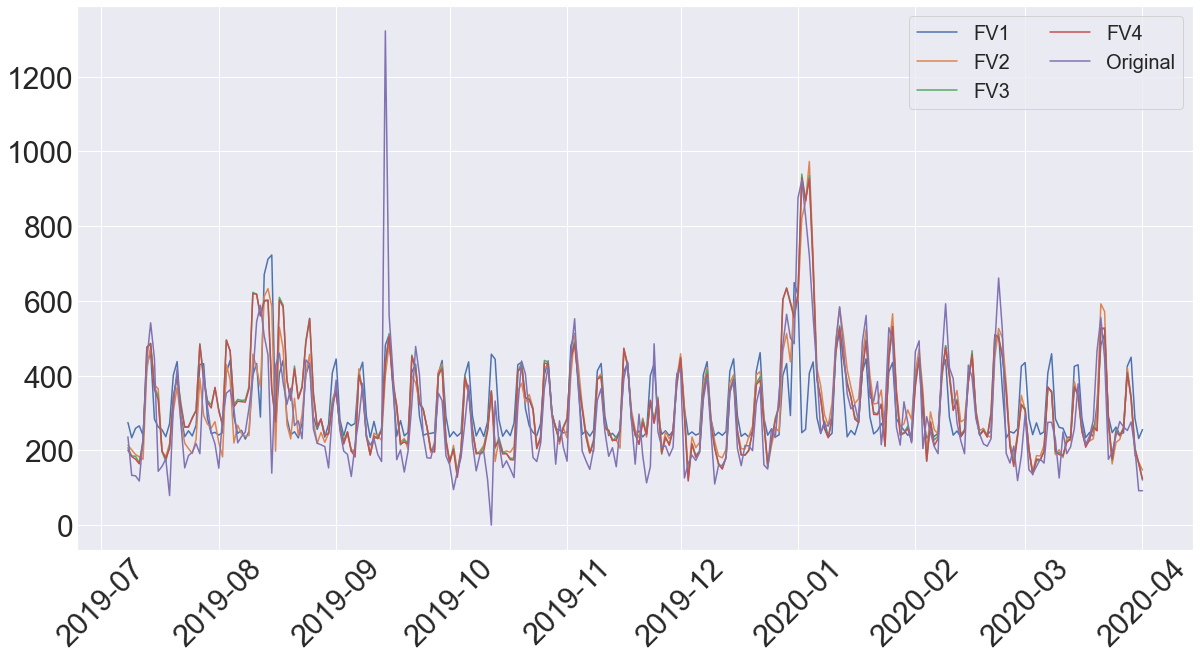

In [8]:
import datetime
import os


FV_list = ["FV1","FV2","FV3","FV4"]
fig, ax = plt.subplots(figsize=(20, 10))
for i in range(4):
    plt.plot(plot_list[0][i], label=FV_list[i])
    # plt.plot(plot_list[0][0], label='FV1')
    # plt.plot(plot_list[0][1], label='FV2')
    # plt.plot(plot_list[0][2], label='FV3')
    # plt.plot(plot_list[0][3], label='FV4')

plt.plot(d_test["CustNum"],label='Original')
# # sxmin='2018-07-08'
# # sxmax='2020-03-12'

# # xmin = datetime.datetime.strptime(sxmin, '%Y-%m-%d')
# # xmax = datetime.datetime.strptime(sxmax, '%Y-%m-%d')
# # plt.xlim([xmin,xmax])

plt.tick_params(length=0)
plt.legend(fontsize=20,ncol=2)
plt.tick_params(labelsize=30)
plt.xticks(rotation=45)

save_dir_name = "/Users/e185716/Documents/2_修士/修論/k228583-master/figs_m2/FV_result/"
os.makedirs(save_dir_name, exist_ok=True)
save_file_name = save_dir_name + "ei_100" + ".png"
fig.savefig(save_file_name,bbox_inches="tight")

In [17]:
import numpy as np
from sklearn.metrics import mean_squared_error, r2_score

In [59]:
len(plot_list)

4

In [29]:
plot_list[0][0]["prediction"]

date
2019-07-08    312.883910
2019-07-09    252.488429
2019-07-10    273.450303
2019-07-11    242.224777
2019-07-12    254.799019
                 ...    
2020-03-28    423.333769
2020-03-29    456.673507
2020-03-30    309.636296
2020-03-31    255.952682
2020-04-01    268.298471
Name: prediction, Length: 269, dtype: float64

In [38]:
for fv in range(len(FV_list)):
    for ei_step in range(len(ei_step_num)):
        rmse = np.sqrt(mean_squared_error(d_test["CustNum"], plot_list[ei_step][fv]))
        #決定係数の計算
        r2 = r2_score(d_test["CustNum"], plot_list[ei_step][fv])
        print(FV_list[fv] + " : ei_" + str(ei_step_num[ei_step]) + " RMSE : " + str(round(rmse,3)))
        print(FV_list[fv] + " : ei_" + str(ei_step_num[ei_step]) + " 決定係数 : " + str(round(r2,3)))

        
    

FV1 : ei_0 RMSE : 130.271
FV1 : ei_0 決定係数 : 0.275
FV1 : ei_1 RMSE : 113.741
FV1 : ei_1 決定係数 : 0.447
FV1 : ei_100 RMSE : 126.646
FV1 : ei_100 決定係数 : 0.314
FV2 : ei_0 RMSE : 102.183
FV2 : ei_0 決定係数 : 0.554
FV2 : ei_1 RMSE : 92.817
FV2 : ei_1 決定係数 : 0.632
FV2 : ei_100 RMSE : 101.624
FV2 : ei_100 決定係数 : 0.559
FV3 : ei_0 RMSE : 99.395
FV3 : ei_0 決定係数 : 0.578
FV3 : ei_1 RMSE : 90.926
FV3 : ei_1 決定係数 : 0.647
FV3 : ei_100 RMSE : 99.16
FV3 : ei_100 決定係数 : 0.58
FV4 : ei_0 RMSE : 98.087
FV4 : ei_0 決定係数 : 0.589
FV4 : ei_1 RMSE : 89.372
FV4 : ei_1 決定係数 : 0.659
FV4 : ei_100 RMSE : 98.268
FV4 : ei_100 決定係数 : 0.587


In [23]:
FV_list

['FV1', 'FV2', 'FV3', 'FV4']

In [21]:
plot_list[2][1]

,prediction
date,
2019-07-08,213.546001
2019-07-09,201.289040
2019-07-10,188.855200
2019-07-11,182.414073
2019-07-12,176.090938
...,...
2020-03-28,421.539976
2020-03-29,338.430510
2020-03-30,186.302113


In [105]:
file_name = "/Users/e185716/グラフ練習/特徴ベクトル/FV4/ei_10/pred.csv"
plot_data = ds.load_data(file_name)
save_dir_name = "/Users/e185716/Documents/2_修士/修論/k228583-master/figs_m2/pred/tenth_ei_pred.csv"
plot_data2 = ds.load_data(save_dir_name)


In [106]:
plot_data

,Unnamed: 0,date,prediction
0,1,2019-07-08,203.771334
1,2,2019-07-09,183.348293
2,3,2019-07-10,180.972113
3,4,2019-07-11,164.399054
4,5,2019-07-12,226.306019
...,...,...,...
264,265,2020-03-28,406.284817
265,266,2020-03-29,342.680653
266,267,2020-03-30,203.849435
267,268,2020-03-31,161.604207


In [109]:
rmse = np.sqrt(mean_squared_error(d_test["CustNum"], plot_data["prediction"]))
print(rmse)

98.23010958827281


In [110]:
rmse = np.sqrt(mean_squared_error(d_test["CustNum"], plot_data2["x"]))
print(rmse)

89.68315037305621


# 誤差最小値

In [9]:
plot_list2 = []  # plotlist[#1][#2] #1がイベントインパクト、#2がFVの組み合わせ
for FV_num in range(1, 5):
    file_name = "/Users/e185716/グラフ練習2/特徴ベクトル/FV" + \
        str(FV_num) + "/ei_error_min/pred.csv"
    plot_data = ds.load_data(file_name)
    plot_data = plot_data.loc[:, ["date", "prediction"]]
    plot_data['date'] = pd.to_datetime(plot_data['date'])
    plot_data.set_index('date', inplace=True)
    plot_list2.append(plot_data)


In [12]:
plot_list2[2]

,prediction
date,
2019-07-08,206.418551
2019-07-09,185.562857
2019-07-10,183.726385
2019-07-11,166.580346
2019-07-12,227.554132
...,...
2020-03-28,410.083879
2020-03-29,342.847937
2020-03-30,206.779981


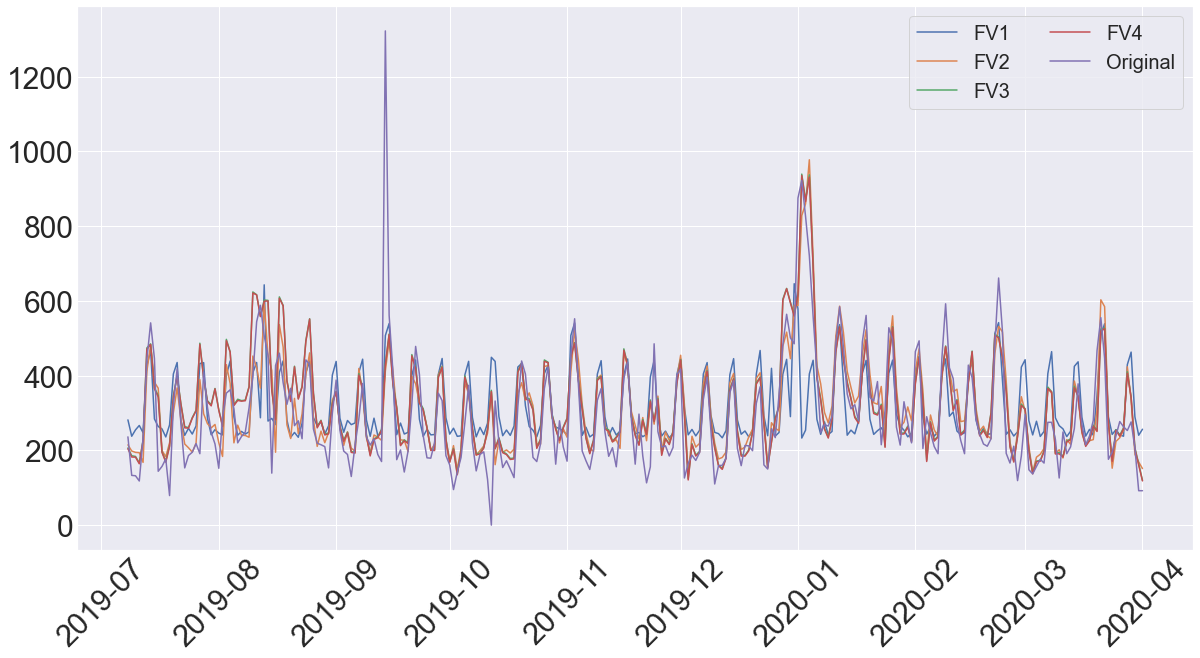

In [13]:
import datetime
import os


FV_list = ["FV1","FV2","FV3","FV4"]
fig, ax = plt.subplots(figsize=(20, 10))
for i in range(4):
    plt.plot(plot_list2[i], label=FV_list[i])


plt.plot(d_test["CustNum"],label='Original')
# # sxmin='2018-07-08'
# # sxmax='2020-03-12'

# # xmin = datetime.datetime.strptime(sxmin, '%Y-%m-%d')
# # xmax = datetime.datetime.strptime(sxmax, '%Y-%m-%d')
# # plt.xlim([xmin,xmax])

plt.tick_params(length=0)
plt.legend(fontsize=20,ncol=2)
plt.tick_params(labelsize=30)
plt.xticks(rotation=45)

save_dir_name = "/Users/e185716/Documents/2_修士/修論/k228583-master/figs_m2/FV_result/"
os.makedirs(save_dir_name, exist_ok=True)
save_file_name = save_dir_name + "ei_error_min" + ".png"
fig.savefig(save_file_name,bbox_inches="tight")

In [39]:
for fv in range(len(plot_list2)):
    rmse = np.sqrt(mean_squared_error(
        d_test["CustNum"], plot_list2[fv]))
    # 決定係数の計算
    r2 = r2_score(d_test["CustNum"], plot_list2[fv])
    print(FV_list[fv] + " : ei_error_min" + " RMSE : " + str(round(rmse,3)))
    print(FV_list[fv] + " : ei_error_min" + " 決定係数 : " + str(round(r2,3)))


FV1 : ei_error_min RMSE : 120.0
FV1 : ei_error_min 決定係数 : 0.384
FV2 : ei_error_min RMSE : 98.483
FV2 : ei_error_min 決定係数 : 0.585
FV3 : ei_error_min RMSE : 99.242
FV3 : ei_error_min 決定係数 : 0.579
FV4 : ei_error_min RMSE : 98.405
FV4 : ei_error_min 決定係数 : 0.586


# クロスバリデーション

In [12]:
all_data = ds.load_data("/Users/e185716/研究/R/ei_make/data_before_split.csv")
all_data['date'] = pd.to_datetime(all_data['date'])


# 'date_column'列をインデックスとして設定
all_data.set_index('date', inplace=True)

all_data = all_data.loc[:,["CustNum"]]

In [8]:
cross_train_first = 0
cross_train_last = 730
cross_test_first = 730
cross_test_last = cross_test_first + 30

loop_num = math.ceil((len(all_data) - cross_train_last)/30)

split_train = []
split_test = []

for i in range(loop_num):
    d_train = all_data[cross_train_first:cross_train_last]
    if i == loop_num:
        d_test = all_data[cross_test_first:len(all_data)]
    else:
        d_test = all_data[cross_test_first:cross_test_last]
    
    split_train.append(d_train)
    split_test.append(d_test)
    
    cross_train_first = cross_train_first + 30
    cross_train_last = cross_train_last + 30
    cross_test_first = cross_test_first + 30
    cross_test_last = cross_test_last + 30

In [13]:
ei_step_num = ["non",0, 100, "error_min"]
# ei_step_num = [100]
# ei_step = 1
# FV_num = 1

cross_plot_list = [[]for i in range(9)] # plotlist[#1][#2] #1が期間、#2がイベントインパクト
for i in range(9):
    for j, ei_step in enumerate(ei_step_num):   
        file_name = "/Users/e185716/グラフ練習2/クロス/ei_" + str(ei_step) + "/period_" + str(i+1) + ".csv"
        plot_data = ds.load_data(file_name)
        plot_data = plot_data.loc[:, ["date", "prediction"]]
        plot_data['date'] = pd.to_datetime(plot_data['date'])
        plot_data.set_index('date', inplace=True)
        cross_plot_list[i].append(plot_data)


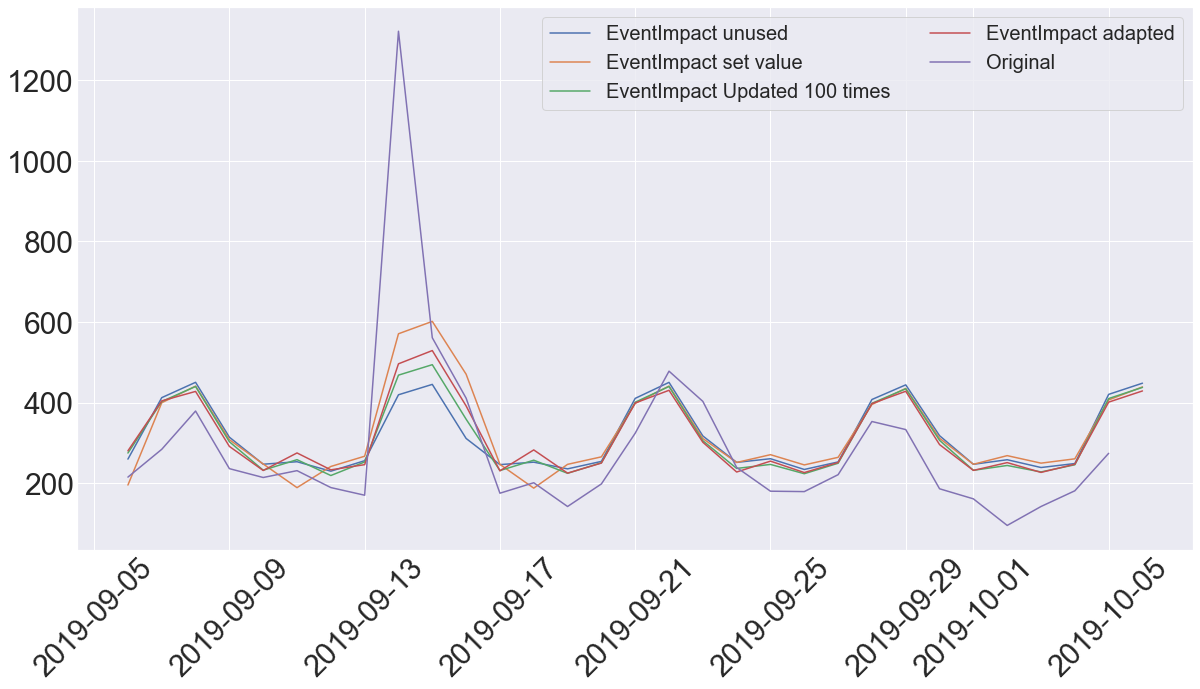

In [15]:
import datetime
import os

plot_period = 3
ei_step_num = ["EventImpact unused","EventImpact set value", "EventImpact Updated 100 times", "EventImpact adapted"]


fig, ax = plt.subplots(figsize=(20, 10))
for i in range(len(ei_step_num)):
    plt.plot(cross_plot_list[plot_period-1][i], label=ei_step_num[i])
    # plt.plot(plot_list[0][0], label='FV1')
    # plt.plot(plot_list[0][1], label='FV2')
    # plt.plot(plot_list[0][2], label='FV3')
    # plt.plot(plot_list[0][3], label='FV4')

plt.plot(split_test[plot_period-1]["CustNum"],label='Original')
# # sxmin='2018-07-08'
# # sxmax='2020-03-12'

# # xmin = datetime.datetime.strptime(sxmin, '%Y-%m-%d')
# # xmax = datetime.datetime.strptime(sxmax, '%Y-%m-%d')
# # plt.xlim([xmin,xmax])

plt.tick_params(length=0)
plt.legend(fontsize=20,ncol=2)
plt.tick_params(labelsize=30)
plt.xticks(rotation=45)

save_dir_name = "/Users/e185716/Documents/2_修士/修論/k228583-master/figs_m2/cross_validation/"
os.makedirs(save_dir_name, exist_ok=True)
save_file_name = save_dir_name + "period_" + str(plot_period) + ".png"
fig.savefig(save_file_name,bbox_inches="tight")